In [34]:
#%cd Desktop
#%cd week-4-Pandas
#!pwd

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [6]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCDC31A7B8>]],
      dtype=object)

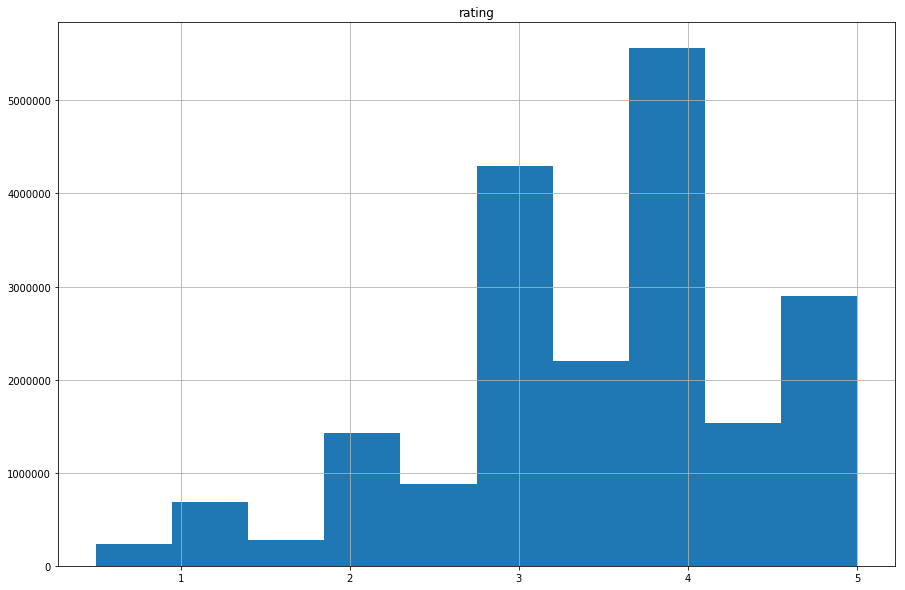

In [7]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

In [8]:
#import pandas as pd
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
output = []
word = []
for x in movies['genres'].str.split('|', expand=False):
    if x not in output:
        output.append(x)
        for z in x:
            if z not in word:
                word.append(z)
print(len(word))
word = word[:-2]
column_values = pd.Series(word)
movies = pd.read_csv('./movielens/movies.csv', sep=',')
movies.head(10)

for genr in word:
    #if genr not in movies.column:
    movies.insert(loc=3, column = genr, value=(movies['genres'].str.contains(genr)), allow_duplicates=False)
    
movies = movies.drop(columns=['genres'])
movies.head()

20


,movieId,title,Western,Musical,War,Documentary,IMAX,Sci-Fi,Mystery,Horror,Thriller,Crime,Action,Drama,Romance,Fantasy,Comedy,Children,Animation,Adventure
0,1,Toy Story (1995),False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,2,Jumanji (1995),False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
2,3,Grumpier Old Men (1995),False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
3,4,Waiting to Exhale (1995),False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False
4,5,Father of the Bride Part II (1995),False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [9]:
tags = pd.read_csv('./movielens/tags.csv', sep=',')
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')
tags = tags.drop(columns=['timestamp'])
tags.head()

,userId,movieId,tag,parsed_time
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [10]:
ratings = pd.read_csv('./movielens/ratings.csv', sep=',')
ratings['parsed_time'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings = ratings.drop(columns=['timestamp'])
ratings.head()

,userId,movieId,rating,parsed_time
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [11]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,Western,Musical,War,Documentary,IMAX,Sci-Fi,Mystery,Horror,...,Drama,Romance,Fantasy,Comedy,Children,Animation,Adventure,userId,tag,parsed_time
0,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,1644,Watched,2014-12-04 23:44:40
1,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,1741,computer animation,2007-07-08 13:59:15
2,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,1741,Disney animated feature,2007-07-08 22:21:47
3,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,1741,Pixar animation,2007-07-08 22:46:10
4,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,False,True,True,True,True,True,1741,TÃ©a Leoni does not star in this movie,2009-06-15 19:19:33


In [12]:
t2 = movies.merge(ratings, on='movieId', how='inner')
#t2= t2.drop(columns=['genres'])
t2['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)
#t2['parsed_time'] = pd.to_datetime(t2['timestamp'], unit='s')
#t2 = t2.drop(columns=['timestamp'])
t2.head()

,movieId,title,Western,Musical,War,Documentary,IMAX,Sci-Fi,Mystery,Horror,...,Romance,Fantasy,Comedy,Children,Animation,Adventure,userId,rating,parsed_time,year
0,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,3,4.0,1999-12-11 13:36:47,1995
1,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,6,5.0,1997-03-13 17:50:52,1995
2,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,8,4.0,1996-06-05 13:37:51,1995
3,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,10,4.0,1999-11-25 02:44:47,1995
4,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,11,4.5,2009-01-02 01:13:41,1995


In [13]:
t2['month'] = t2['parsed_time'].dt.month
t2['week'] = t2['parsed_time'].dt.week
t2.head()

,movieId,title,Western,Musical,War,Documentary,IMAX,Sci-Fi,Mystery,Horror,...,Comedy,Children,Animation,Adventure,userId,rating,parsed_time,year,month,week
0,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,True,True,True,True,3,4.0,1999-12-11 13:36:47,1995,12,49
1,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,True,True,True,True,6,5.0,1997-03-13 17:50:52,1995,3,11
2,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,True,True,True,True,8,4.0,1996-06-05 13:37:51,1995,6,23
3,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,True,True,True,True,10,4.0,1999-11-25 02:44:47,1995,11,47
4,1,Toy Story (1995),False,False,False,False,False,False,False,False,...,True,True,True,True,11,4.5,2009-01-02 01:13:41,1995,1,1


In [14]:
print(len(t2))
average_rating = t2[['title','rating']].groupby('title', as_index=False).mean()
average_rating.head()

20000263


,title,rating
0,"""Great Performances"" Cats (1998)",2.748387
1,#chicagoGirl: The Social Network Takes on a Di...,3.666667
2,$ (Dollars) (1971),2.833333
3,$5 a Day (2008),2.871795
4,$9.99 (2008),3.009091


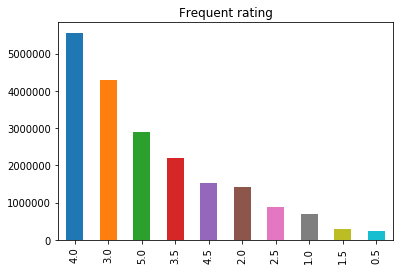

In [28]:
t2['rating'].value_counts().plot(kind='bar', title = 'Frequent rating')

In [16]:
monthly =t2[['rating','month']].groupby('month').count()
print(monthly)

        rating
month         
1      1828005
2      1506761
3      1774307
4      1509668
5      1517355
6      1614649
7      1716327
8      1567547
9      1317239
10     1727218
11     2002309
12     1918878


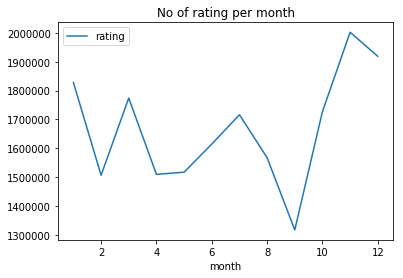

In [29]:
monthly.plot(title = 'No of rating per month')

In [19]:
relyear = t2[['rating','year']].groupby('year').count()
relyear = relyear[:-2]
#print(relyear)
#relyear.plot()

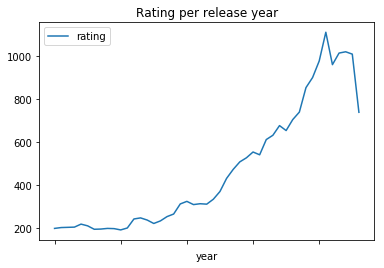

In [33]:
relyear.isnull().any()
relyear = relyear[relyear.rating >= 185]

relyear.plot(title = 'Rating per release year')


In [21]:
t3 = t2 [['Western', 'Musical', 'War', 'Documentary', 'IMAX', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Crime', 'Action', 'Drama', 'Romance','Fantasy','Comedy','Children', 'Animation','Adventure']]
t3.head()

itervals = []  
for column in t3.columns:
    itercols = t3.columns.tolist()
    itervals.append(t3[column].sum())
print(itervals)

[423714, 870915, 1048618, 244619, 492366, 3150141, 1557282, 1482737, 5313506, 3298335, 5614208, 8857853, 3802002, 2111403, 7502234, 1669249, 1140476, 4380351]


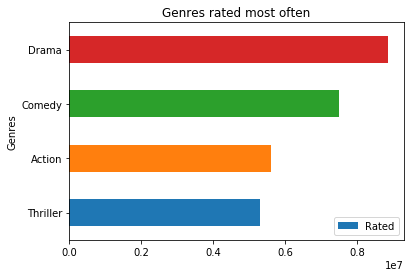

In [23]:
df2 = pd.DataFrame(
    {'Genres': itercols,
     'Rated': itervals,
     })
df2.head()
df2= df2.nlargest(4, 'Rated')
df2.sort_values(by='Rated',ascending=True).plot(x = 'Genres', y = 'Rated', kind = 'barh',title='Genres rated most often')